Perform the following operations using Python on Hepatitis dataset.
q. Data cleaning(Remove NA, ?, Negative values etc.)
r. Error correcting(Outlier detection and removal)
s. Data transformation
t. Build Data model using regression and Naïve Bayes methods for prediction class DIE, LIVE and compare accuracy Prediction.

In [171]:
import pandas as pd
import numpy as np

In [172]:
df = pd.read_csv("./hepatitis.csv")

In [173]:
df

,Target,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIGLIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,2,2,2,2,2,NaN,2,2,2,2,2,2,2,2,2,2
1,2,50,1,1,2,1,2,2,1,2,2,2,2,0.9,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,0.7,96,32,4,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,1,?,200,4,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,1,1,1,7.6,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,2,2,2,2,0.9,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,2,1,2,2,0.8,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


### Remove NA

In [174]:
df.isna().sum()

Target                 0
AGE                    0
SEX                    0
STEROID                0
ANTIVIRALS             0
FATIGUE                0
MALAISE                0
ANOREXIA               0
LIVER_BIGLIVER_FIRM    1
SPLEEN_PALPABLE        0
SPIDERS                0
ASCITES                0
VARICES                0
BILIRUBIN              0
ALK PHOSPHATE          0
SGOT                   0
ALBUMIN                0
PROTIME                0
HISTOLOGY              0
dtype: int64

In [175]:
df.LIVER_BIGLIVER_FIRM.fillna(0, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Target               155 non-null    int64 
 1   AGE                  155 non-null    int64 
 2   SEX                  155 non-null    int64 
 3   STEROID              155 non-null    object
 4   ANTIVIRALS           155 non-null    int64 
 5   FATIGUE              155 non-null    object
 6   MALAISE              155 non-null    object
 7   ANOREXIA             155 non-null    object
 8   LIVER_BIGLIVER_FIRM  155 non-null    object
 9   SPLEEN_PALPABLE      155 non-null    object
 10  SPIDERS              155 non-null    object
 11  ASCITES              155 non-null    object
 12  VARICES              155 non-null    object
 13  BILIRUBIN            155 non-null    object
 14  ALK PHOSPHATE        155 non-null    object
 15  SGOT                 155 non-null    object
 16  ALBUMIN 

### Outlier removal

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Target               155 non-null    int64 
 1   AGE                  155 non-null    int64 
 2   SEX                  155 non-null    int64 
 3   STEROID              155 non-null    object
 4   ANTIVIRALS           155 non-null    int64 
 5   FATIGUE              155 non-null    object
 6   MALAISE              155 non-null    object
 7   ANOREXIA             155 non-null    object
 8   LIVER_BIGLIVER_FIRM  155 non-null    object
 9   SPLEEN_PALPABLE      155 non-null    object
 10  SPIDERS              155 non-null    object
 11  ASCITES              155 non-null    object
 12  VARICES              155 non-null    object
 13  BILIRUBIN            155 non-null    object
 14  ALK PHOSPHATE        155 non-null    object
 15  SGOT                 155 non-null    object
 16  ALBUMIN 

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

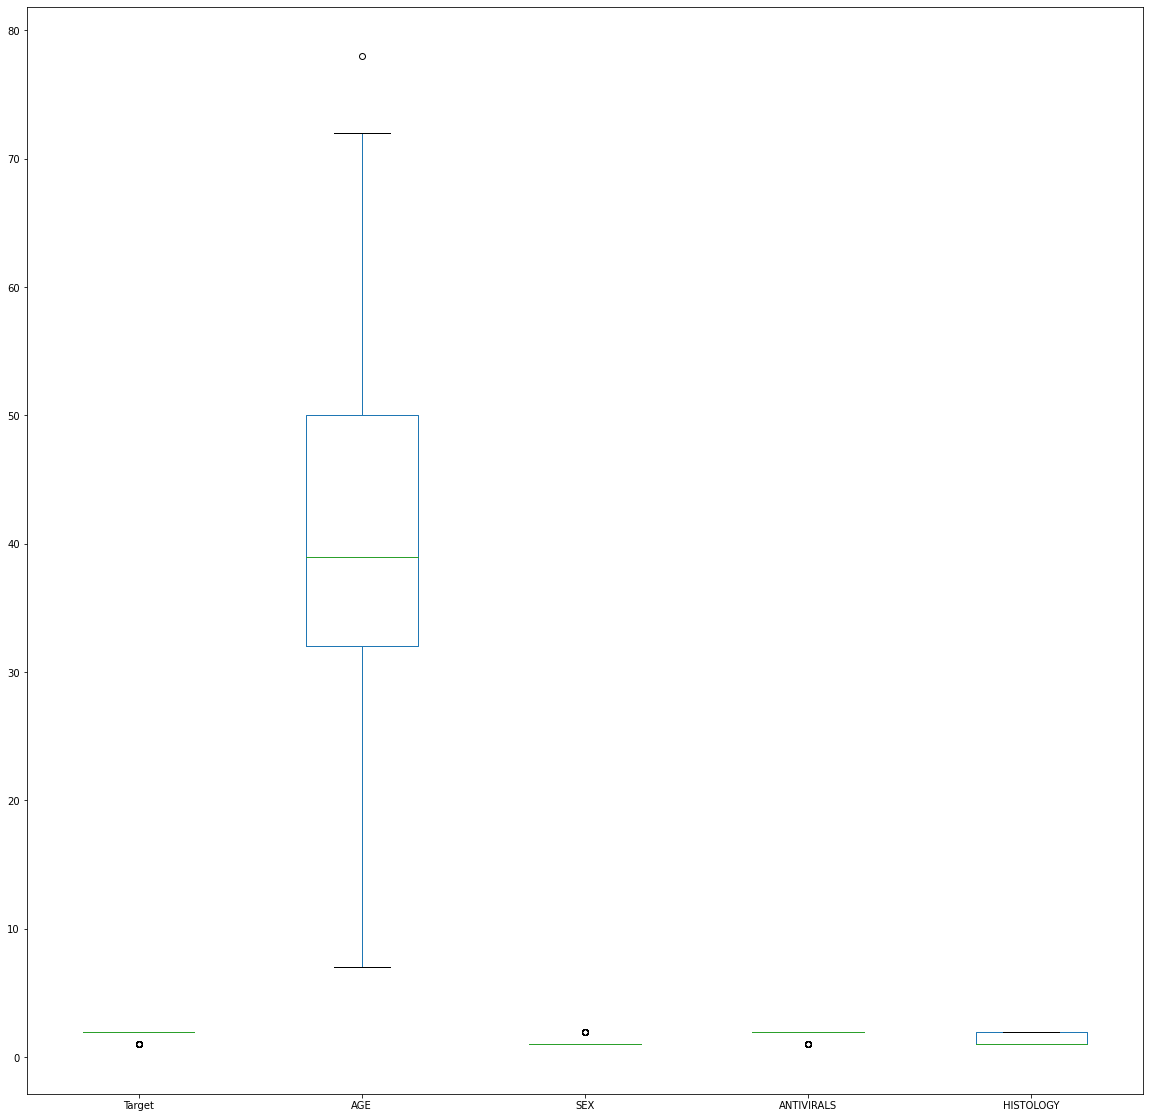

In [177]:
import seaborn as sea
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df.plot(kind="box", figsize=(20,20))

In [178]:
q1 = df.AGE.quantile(0.25)
q3 = df.AGE.quantile(0.75)
iqr = q3-q1
lower = q1 - 1.5*iqr
higher = q3 + 1.5*iqr


## Detection

In [179]:
detection = df[(df.AGE<lower) | (df.AGE > higher)]
detection

,Target,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIGLIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
2,2,78,1,2,2,1,2,2,2,2,2,2,2,0.7,96,32,4,?,1


In [180]:
removal = df[(df.AGE>lower) | (df.AGE < higher)]
removal

,Target,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIGLIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2
1,2,50,1,1,2,1,2,2,1,2,2,2,2,0.9,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,0.7,96,32,4,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,0.7,46,52,4,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,1,?,200,4,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,1,1,1,7.6,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,2,2,2,2,0.9,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,2,1,2,2,0.8,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,1,1,2,1,1.5,81,19,4.1,48,2


## Data Transformation

## Regression

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

df['STEROID'].value_counts()

2    79
1    75
?     1
Name: STEROID, dtype: int64

In [182]:
nf = df[df['STEROID'] == '?'].index
df.drop(index=nf, axis=1, inplace=True)
df['STEROID'].value_counts()

for i in df.columns:
    nf = df[df[i] == '?'].index
    df.drop(index=nf, axis=1, inplace=True)
    df[i].value_counts()

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 154
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Target               81 non-null     int64 
 1   AGE                  81 non-null     int64 
 2   SEX                  81 non-null     int64 
 3   STEROID              81 non-null     object
 4   ANTIVIRALS           81 non-null     int64 
 5   FATIGUE              81 non-null     object
 6   MALAISE              81 non-null     object
 7   ANOREXIA             81 non-null     object
 8   LIVER_BIGLIVER_FIRM  81 non-null     object
 9   SPLEEN_PALPABLE      81 non-null     object
 10  SPIDERS              81 non-null     object
 11  ASCITES              81 non-null     object
 12  VARICES              81 non-null     object
 13  BILIRUBIN            81 non-null     object
 14  ALK PHOSPHATE        81 non-null     object
 15  SGOT                 81 non-null     object
 16  ALBUMIN  

In [184]:
df["STEROID"] = df["STEROID"].astype(int)

for i in df.columns[5:13]:
    df[i] = df[i].astype(int)
    
for i in df.columns[13:19]:
    df[i] = df[i].astype(float)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 154
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Target               81 non-null     int64  
 1   AGE                  81 non-null     int64  
 2   SEX                  81 non-null     int64  
 3   STEROID              81 non-null     int32  
 4   ANTIVIRALS           81 non-null     int64  
 5   FATIGUE              81 non-null     int32  
 6   MALAISE              81 non-null     int32  
 7   ANOREXIA             81 non-null     int32  
 8   LIVER_BIGLIVER_FIRM  81 non-null     int32  
 9   SPLEEN_PALPABLE      81 non-null     int32  
 10  SPIDERS              81 non-null     int32  
 11  ASCITES              81 non-null     int32  
 12  VARICES              81 non-null     int32  
 13  BILIRUBIN            81 non-null     float64
 14  ALK PHOSPHATE        81 non-null     float64
 15  SGOT                 81 non-null     floa

In [186]:
X = df.drop(['Target'], axis = 1)
Y = df.Target

x_train, x_test, y_train, y_test = train_test_split(X, Y, )

In [187]:
model = LogisticRegression()
model.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [188]:
y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred)*100

90.47619047619048

## Naïve Bayes methods

In [189]:
bayes = GaussianNB()
bayes.fit(x_train, y_train)

GaussianNB()

In [190]:
y_test = bayes.predict(x_test)

In [191]:
accuracy_score(y_test, y_pred)*100

61.904761904761905